# Objetivo

O projeto tem como objetivo fazer uma análise nos dados disponibilizados pelo Ministério da Saúde a respeito dos casos de Síndrome Respiratória Aguda Grave (SARS) hospitalizados no período de 2021 até julho de 2024. Vale ressaltar que estão inclusos dados a respeito dos casos de COVID-19.

Os conjuntos dos dados bem como um PDF contendo a descrição dos mesmos pode ser acessado através do link: https://dados.gov.br/dados/conjuntos-dados/srag-2021-e-2022

# Imports

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Inicializando Datasets

In [2]:
df_2021 = pd.read_csv("SRAG 2021 - 01-05.csv", delimiter = ';')
df_2022 = pd.read_csv("SRAG 2022 - 03-04.csv", delimiter = ';')
df_2023 = pd.read_csv("SRAG 2023 - 05-08.csv", delimiter = ';')
df_2024 = pd.read_csv("SRAG 2024 - 05-08.csv", delimiter = ';')

C:\Users\leona\AppData\Local\Temp\ipykernel_3588\3209780142.py:1: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("SRAG 2021 - 01-05.csv", delimiter = ';')
C:\Users\leona\AppData\Local\Temp\ipykernel_3588\3209780142.py:2: DtypeWarning: Columns (15,53,59,61,62,63,91,93,120,122,143,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv("SRAG 2022 - 03-04.csv", delimiter = ';')
C:\Users\leona\AppData\Local\Temp\ipykernel_3588\3209780142.py:3: DtypeWarning: Columns (15,18,20,23,53,61,62,63,72,74,79,91,93,109,120,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv("SRAG 2023 - 05-08.csv", delimiter = ';')
C:\Users\leona\AppData\Local\Temp\ipykernel_3588\3209780142.py:4: DtypeWarning: Columns (15,53,93,120,171,175,178) have mixed types. Specify dtype option on i

# Tratando Dados

In [3]:
print(f"Shape dataset 2021: {df_2021.shape}")
print(f"Shape dataset 2022: {df_2022.shape}")
print(f"Shape dataset 2023: {df_2023.shape}")
print(f"Shape dataset 2024: {df_2024.shape}")

Shape dataset 2021: (1731290, 166)
Shape dataset 2022: (557476, 173)
Shape dataset 2023: (279192, 190)
Shape dataset 2024: (161525, 191)


In [4]:
def drop_cols(dataframe):
    colunas_df = dataframe.columns
    colunas_drop = ["DT_NOTIFIC", "DT_SIN_PRI", "TEM_CPF", "NU_CPF", "ESTRANG", "NU_CNS", "NM_PACIENT", "DT_NASC", "CS_ETINIA", "TP_POV_CT", "PAC_COCBO", "PAC_DSCBO", 
                    "NM_MAE_PAC", "NU_CEP", "NM_BAIRRO", "NM_LOGRADO", "NU_NUMERO", "NM_COMPLEM", "NU_DDD_TEL", "NU_TELEFON", "OBES_IMC", "FNT_IN_COV", "DT_UT_DOSE", 
                    "DT_VAC_MAE", "OUT_ANTIV", "DT_ANTIVIR", "OUT_TRAT", "DT_TRT_COV", "DT_INTERNA", "RAIOX_OUT", "DT_RAIOX", "TOMO_OUT", "DT_TOMO", "DT_COLETA", "OUT_AMOST", 
                    "REQUI_GAL", "DT_RES_AN", "CO_LAB_AN", "DT_PCR", "FLUASU_OUT", "FLUBLI_OUT", "DS_PCR_OUT", "DT_CO_SOR", "OUT_SOR", "SOR_OUT", "DT_RES", "CLASSI_OUT", 
                    "DT_EVOLUCA", "DT_ENCERRA", "NU_DO", "OBSERVA", "NOME_PROF", "REG_PROF", "DT_DIGITA", "COD_IDADE", "CO_REGIONA", "CO_MUN_NOT", "CO_UNI_NOT", "CO_PAIS", 
                    "CO_RG_RESI", "CO_MUN_RES", "CO_RG_INTE", "CO_MU_INTE", "LAB_PR_COV", "DT_RT_VGM", "DT_VGM", "CO_PS_VGM", "LO_PS_VGM", "SURTO_SG"]
    
    drops = [] 
    # Algumas das colunas que queremos remover podem não estar no dataframe, então criamos um outro array para armazer as que estão em ambas as listas (colunas_df e colunas_drop) 
    # para removê-las de uma única vez
    
    for coluna in colunas_df:
        if coluna in colunas_drop:
            drops.append(coluna)

    dataframe = dataframe.drop(drops, axis = 1)

    return dataframe

In [5]:
df_2021_t = drop_cols(df_2021)
df_2022_t = drop_cols(df_2022)
df_2023_t = drop_cols(df_2023)
df_2024_t = drop_cols(df_2024)

In [6]:
del df_2021
del df_2022
del df_2023
del df_2024

In [7]:
print(f"Shape dataset 2021 tratado: {df_2021_t.shape}")
print(f"Shape dataset 2022 tratado: {df_2022_t.shape}")
print(f"Shape dataset 2023 tratado: {df_2023_t.shape}")
print(f"Shape dataset 2024 tratado: {df_2024_t.shape}")

Shape dataset 2021 tratado: (1731290, 119)
Shape dataset 2022 tratado: (557476, 124)
Shape dataset 2023 tratado: (279192, 141)
Shape dataset 2024 tratado: (161525, 142)


Os dataframes seguem sem ter o mesmo número de colunas pelo fato de que algumas colunas são a respeito de informações que não existiam naquele ano, por exemplo, o dataframe de 2022 passa a ter como a data que o paciente recebeu a 2a dose de reforço contra a COVID-19.

Dataframes de anos posteriores contém todas as colunas presentes em dataframes de anos anteriores.

# Explorando datasets separadamente

Nessa etapa irei analisar se existe alguma coluna que não estava marcada no dicionário de dados ou se as colunas estão com outro nome, avaliando novamente se é possível limpar mais dados.

Passarei as colunas do dataset registradas pelos códigos a seguir para o Excel para continuar com a organização dos dados, usando procv é possível ver as colunas que mantiveram o mesmo nome, as que retornarem #N/D não foram encontradas na tabela original (referente ao dicionário de dados) sendo assim avaliadas individualmente nessa etapa.

Esse passo serve para novamente me ajudar a analisar as colunas e caso ache necessário remover mais algumas. Como o dataset de um ano posterior tem todas as colunas dos anos anteriores, as colunas que eu julgar que não fazem sentido para as análises serão adicionadas diretamente na função feita anteriormente que remove diversas colunas de uma única vez.

## Dados 2021

In [8]:
for coluna in df_2021_t.columns:
    print(coluna)

SEM_NOT
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADENO
AN_OUTRO
DS_AN_OUT
TP_AM_SOR
T

In [9]:
df_2021_t.fillna("Não preenchido")

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_GESTANT,...,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LOTE_1_COV,LOTE_2_COV
0,1,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,ALAGOINHAS,HOSPITAL REGIONAL DANTAS BIAO,M,69,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
1,1,1,BA,NUCLEO REGIONAL DE SAUDE SUL,ITABUNA,HOSPITAL CALIXTO MIDLEJ FILHO,M,89,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
2,1,1,PR,02RS METROPOLITANA,CURITIBA,COMPLEXO HOSPITALAR DO TRABALHADOR,F,51,3,5,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
3,1,1,PR,17RS LONDRINA,LONDRINA,HCL HOSPITAL DO CANCER DE LONDRINA,M,57,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
4,2,1,RS,007 CRS,DOM PEDRITO,HOSPITAL SAO LUIZ,M,81,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731285,51,50,RJ,Não preenchido,MACAE,PRONTO SOCORRO MUNICIPAL,F,26,3,9,...,1.0,17/08/2021,Não preenchido,Não preenchido,87 - COVID-19 PFIZER - COMIRNATY,Não preenchido,Não preenchido,Não preenchido,FD7222,Não preenchido
1731286,11,9,MS,NRS DE TRES LAGOAS,SANTA RITA DO PARDO,UNIDADE MISTA DE SAUDE NOSSA S PERPETUO SOCORRO,F,47,3,5,...,9.0,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
1731287,18,17,RJ,Não preenchido,DUQUE DE CAXIAS,UPA SARAPUI,F,60,3,9,...,1.0,07/07/2021,18/09/2021,Não preenchido,88 - COVID-19 JANSSEN - AD26.COV2.S,87 - COVID-19 PFIZER - COMIRNATY,Não preenchido,Não preenchido,211A21A,FF8840
1731288,17,43,SP,GVE XVII CAMPINAS,CAMPINAS,UNIDADE DE PRONTO ATENDIMENTO DR SERGIO AROUCA...,M,1,3,6,...,2.0,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido


## Dados 2022

In [10]:
for coluna in df_2022_t.columns:
    print(coluna)

SEM_NOT
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADENO
AN_OUTRO
DS_AN_OUT
TP_AM_SOR
T

A partir dessa etapa conseguimos ver a real diferença entre os datasets, no dataset de 2021, a dose de reforço contra a COVID-19 ainda não existia por exemplo, e após a confirmação do vírus começaram a ser feitas as anotações a respeito do tratamento da mesma com o uso de antivirais.

In [11]:
for coluna in df_2022_t.columns:
    if coluna not in df_2021_t.columns:
        print(coluna)

DOSE_2REF
FAB_COVRF2
LOTE_REF2
TRAT_COV
TIPO_TRAT


In [12]:
df_2022_t.fillna("Não preenchido")

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_GESTANT,...,FAB_COV_2,FAB_COVREF,LOTE_1_COV,LOTE_2_COV,LOTE_REF,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT
0,1,1,RJ,Não preenchido,RIO DE JANEIRO,SMS UPA 24H MAGALHAES BASTOS AP 51,M,23,3,6,...,Não preenchido,Não preenchido,202010019,210017,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
1,1,1,MS,NRS DE DOURADOS,DOURADOS,HOSPITAL EVANGELICO DR SRA GOLDSBY KING,F,37,3,5,...,Não preenchido,Não preenchido,FC2495,FF8844,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
2,1,1,GO,SAO PATRICIO,RUBIATABA,HOSPITAL MUNICIPAL DE RUBIATABA,F,33,3,5,...,Não preenchido,Não preenchido,202010031,202010031,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
3,1,1,GO,PIRINEUS,ANAPOLIS,HOSPITAL EVANGELICO GOIANO SA,M,76,3,6,...,Não preenchido,Não preenchido,210060,210120,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
4,1,1,SP,GVE XXVII SAO JOSE DOS CAMPOS,SAO JOSE DOS CAMPOS,HOSPITAL VIVALLE,F,16,3,5,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557471,48,47,PI,4 GRS TERESINA,TERESINA,CASAMATER,F,87,3,6,...,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,87 - COVID-19 PFIZER - COMIRNATY,4120Z025,213VCD008VA,FM3884,23/04/2022,87 - COVID-19 PFIZER - COMIRNATY,FP8073,2.0,Não preenchido
557472,26,25,SC,ITAJAI,ITAJAI,HOSPITAL E MATERNIDADE MARIETA KONDER BORNHAUSEN,M,27,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
557473,48,47,PE,001,OLINDA,MATERNIDADE BRITES DE ALBUQUERQUE,M,73,3,6,...,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,88 - COVID-19 JANSSEN - AD26.COV2.S,214VCD085W,219VCD281Z,205F21A,11/10/2022,87 - COVID-19 PFIZER - COMIRNATY,202001,Não preenchido,Não preenchido
557474,8,30,RO,I GRS JI PARANA,JI-PARANA,DIVISAO DE VIGILANCIA EPIDEMIOLOGICA,F,1,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido


## Dados 2023

In [13]:
for coluna in df_2023_t.columns:
    print(coluna)

SEM_NOT
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADENO
AN_OUTRO
DS_AN_OUT
TP_AM_SOR
T

As colunas que estão no dataset de 2023 mas não estão nos anteriores não possuem descrição no dicionário de dados e como a maioria delas são a respeito de datas ou valores marcados como nulos essas colunas também serão desconsideradas.

Como sabemos que os datasets de anos posteriores possuem todas as colunas de anos anteriores precisamos remover essas colunas tanto do dataset de 2023 como do de 2024

In [14]:
colunas_drop = []

for coluna in df_2023_t.columns:
    if coluna not in df_2022_t.columns:
        colunas_drop.append(coluna)

print(colunas_drop)

['CO_DETEC', 'VG_OMS', 'VG_OMSOUT', 'VG_LIN', 'VG_MET', 'VG_METOUT', 'VG_DTRES', 'VG_ENC', 'VG_REINF', 'REINF', 'FAB_ADIC', 'LOT_RE_BI', 'FAB_RE_BI', 'DOSE_ADIC', 'DOS_RE_BI', 'LOTE_ADIC', 'TABAG']


In [15]:
df_2023_t = df_2023_t.drop(colunas_drop, axis = 1)

In [16]:
df_2024_t = df_2024_t.drop(colunas_drop, axis = 1)

In [17]:
df_2023_t.fillna("Não preenchido")

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_GESTANT,...,FAB_COV_2,FAB_COVREF,LOTE_1_COV,LOTE_2_COV,LOTE_REF,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT
0,6,4,RS,014 CRS,CAMPINA DAS MISSOES,POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES,M,81,3,6,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,210051,210132,FG3531,07/06/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,21OVCD316Z,9.0,Não preenchido
1,7,7,SC,FLORIANOPOLIS,FLORIANOPOLIS,INSTITUTO DE ENSINO E PESQUISA DR IRINEU MAY B...,M,76,3,6,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Não preenchido,210075,210132,Não preenchido,30/07/2022,87 - COVID-19 PFIZER - COMIRNATY,FP7498,Não preenchido,Não preenchido
2,8,7,SP,GVE I CAPITAL,SAO PAULO,BP MIRANTE,F,20,3,9,...,87 - COVID-19 PFIZER - COMIRNATY,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,FE2083,FF8844,219VCD291W,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido
3,7,5,SP,GVE XXIV RIBEIRAO PRETO,CAJURU,CASA DE CARIDADE SAO VICENTE DE PAULO CAJURU,F,18,3,5,...,87 - COVID-19 PFIZER - COMIRNATY,87 - COVID-19 PFIZER - COMIRNATY,FF2591,FG3533,FT7280,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
4,9,8,PR,02RS METROPOLITANA,CURITIBA,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,M,2,2,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279187,49,48,MG,JUIZ DE FORA,JUIZ DE FORA,SANTA CASA DE MISERICORDIA DE JUIZ DE FORA,F,91,3,6,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,210014,210014,FH8025,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
279188,52,51,GO,CENTRAL,GOIANIA,HOSPITAL ESTADUAL DA CRIANCA E DO ADOLESCENTE ...,F,5,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido
279189,1,52,MG,MONTES CLAROS,MONTES CLAROS,HOSPITAL SANTA CASA DE MONTES CLAROS,M,1,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
279190,50,46,BA,NUCLEO REGIONAL DE SAUDE SUL,ITABUNA,HOSPITAL CALIXTO MIDLEJ FILHO,M,87,3,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido


## Dados 2024

In [18]:
for coluna in df_2024_t.columns:
    print(coluna)

SEM_NOT
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADENO
AN_OUTRO
DS_AN_OUT
TP_AM_SOR
T

In [19]:
colunas_drop = []

for coluna in df_2024_t.columns:
    if coluna not in df_2023_t.columns:
        colunas_drop.append(coluna)

print(colunas_drop)

['CASO_SRAG']


Novamente a coluna presente no dataset de 2024 não possui descrição no dicionário então também será removida

In [20]:
df_2024_t = df_2024_t.drop(colunas_drop, axis = 1)

In [21]:
df_2024_t.fillna("Não preenchido")

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_GESTANT,...,FAB_COV_2,FAB_COVREF,LOTE_1_COV,LOTE_2_COV,LOTE_REF,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT
0,3,1,MG,BELO HORIZONTE,BELO HORIZONTE,HOSPITAL DA BALEIA,F,53,3,5,...,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,87 - COVID-19 PFIZER - COMIRNATY,213VCD030Z,214VCD110Z,FF2592,22/08/2022,87 - COVID-19 PFIZER - COMIRNATY,1F1062A,2.0,Não preenchido
1,5,2,SP,GVE I CAPITAL,SAO PAULO,HOSPITAL BOSQUE DA SAUDE,M,51,3,6,...,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,87 - COVID-19 PFIZER - COMIRNATY,214VCD069W,216VCD219W,FM2958,05/07/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,221VCD008Z,9.0,Não preenchido
2,6,4,BA,NUCLEO REGIONAL DE SAUDE LESTE,SALVADOR,HOSPITAL SAO RAFAEL,M,81,3,6,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,210038,210054,31045BD,11/04/2022,87 - COVID-19 PFIZER - COMIRNATY,FN9606,2.0,Não preenchido
3,6,5,SC,XANXERE,XANXERE,HOSPITAL REGIONAL SAO PAULO ASSEC,F,71,3,6,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Não preenchido,210214,210218,Não preenchido,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido
4,7,6,PR,02RS METROPOLITANA,CURITIBA,HOSPITAL DO IDOSO ZILDA ARNS,F,38,3,5,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,202010036,210011A,21OVCD324X,Não preenchido,Não preenchido,Não preenchido,9.0,Não preenchido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161520,25,25,BA,NUCLEO REGIONAL DE SAUDE LESTE,SALVADOR,HOSPITAL GERAL ROBERTO SANTOS,M,5,2,6,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido
161521,30,29,RS,002 CRS,GUAIBA,HOSPITAL REGIONAL NELSON CORNETET,M,69,3,6,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Não preenchido,210132,210470,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
161522,30,29,PR,02RS METROPOLITANA,CAMPO LARGO,HOSPITAL DO ROCIO,M,34,3,6,...,87 - COVID-19 PFIZER - COMIRNATY,Não preenchido,FD7219,FF2592,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
161523,27,27,SP,GVE XX PIRACICABA,PIRACICABA,HOSPITAL UNIMED PIRACICABA,M,92,3,6,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,202010026,210053,FF8846,04/05/2022,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,B202107089,Não preenchido,Não preenchido


# Observações após a exploração dos dados

Terminada a etapa de tratamento dos dados onde ocorreram as limpezas iniciais nos datasets, a etapa de exploração foi fundamental para identificar as demais colunas que não possuiam descrição no dicionário de dados e limpar aquelas que não foi possível identificar o que a coluna representava. 

Com essa etapa finalizada os datasets ficaram bem mais equilibrados, os datasets com os anos de 2022, 2023 e 2024 contendo a mesma quantidade de colunas e o dataset de 2021 com algumas a menos por razões que já foram explicadas previamente: algumas colunas como a referente à 2a dose de reforço não existem por questões do tempo, a 2a dose de reforço ainda não havia sido disponibilizada na época por exemplo.

In [22]:
print(f"Shape dataset 2021 tratado: {df_2021_t.shape}")
print(f"Shape dataset 2022 tratado: {df_2022_t.shape}")
print(f"Shape dataset 2023 tratado: {df_2023_t.shape}")
print(f"Shape dataset 2024 tratado: {df_2024_t.shape}")

Shape dataset 2021 tratado: (1731290, 119)
Shape dataset 2022 tratado: (557476, 124)
Shape dataset 2023 tratado: (279192, 124)
Shape dataset 2024 tratado: (161525, 124)


Antes de começar a etapa de analises efetivamente, existe mais um tratamento que achei válido realizar. Muitas das colunas numéricas dos datframes representam respostas para a pergunta, por exemplo no caso a seguir, onde os dados da coluna TP_IDADE possuem a seguinte descrição:

1 - Dia (Caso o paciente tenha menos de 30 dias de vida)

2 - Mês (Caso o paciente tenha menos de 1 ano de vida)

3 - Ano (Caso o paciente tenha a partir de 1 ano de vida) 

Para facilitar as interpretações dos gráficos serão feitas as devidas alterações

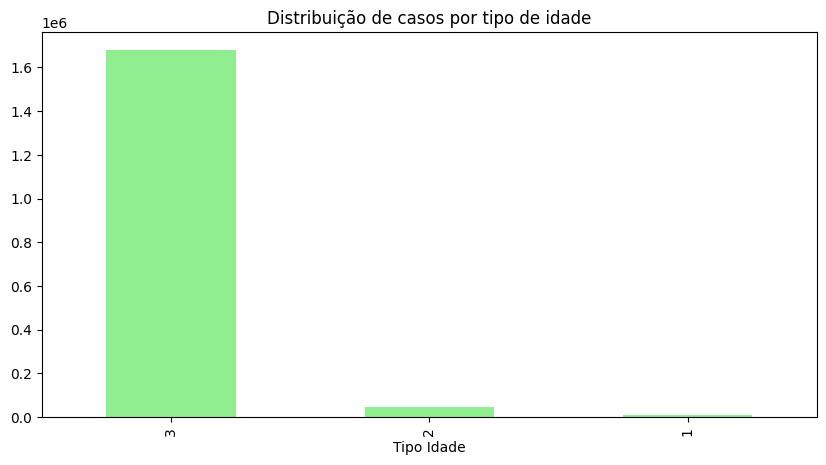

In [45]:
tipo_idade = df_2021_t['TP_IDADE'].value_counts()
plt.figure(figsize=(10, 5))
tipo_idade.plot(kind='bar', color='lightgreen')
plt.xlabel('Tipo Idade')
plt.title('Distribuição de casos por tipo de idade')
plt.show()

## Atualizando dados

In [52]:
nivel_escolaridade = {
    1: 'Sem escolaridade / Analfabeto',
    2: 'Fundamental 1º ciclo (1ª a 5ª série)',
    3: 'Fundamental 2º ciclo (6ª a 9ª série)',
    4: 'Superior',
    5: 'Não se aplica',
    9: 'Ignorado'
}

df_2021_t['CS_ESCOL_N'] = df_2021_t['CS_ESCOL_N'].replace(nivel_escolaridade)
df_2022_t['CS_ESCOL_N'] = df_2022_t['CS_ESCOL_N'].replace(nivel_escolaridade)
df_2023_t['CS_ESCOL_N'] = df_2023_t['CS_ESCOL_N'].replace(nivel_escolaridade)
df_2024_t['CS_ESCOL_N'] = df_2024_t['CS_ESCOL_N'].replace(nivel_escolaridade)

In [53]:
df_2021_t['CS_ESCOL_N'].unique()

array(['Ignorado', nan, 'Sem escolaridade/ Analfabeto', 'Não se aplica',
       'Superior', 'Fundamental 2º ciclo (6ª a 9ª série)', 0.0,
       'Fundamental 1º ciclo (1ª a 5ª série)'], dtype=object)

In [125]:
antiviral = {
    1: 'Oseltamivir',
    2: 'Zanamivir',
    3: 'Outro'
}

df_2021_t['TP_ANTIVIR'] = df_2021_t['TP_ANTIVIR'].replace(antiviral)
df_2022_t['TP_ANTIVIR'] = df_2022_t['TP_ANTIVIR'].replace(antiviral)
df_2023_t['TP_ANTIVIR'] = df_2023_t['TP_ANTIVIR'].replace(antiviral)
df_2024_t['TP_ANTIVIR'] = df_2024_t['TP_ANTIVIR'].replace(antiviral)

In [57]:
df_2021_t['TP_ANTIVIR'].unique()

array([nan, 'Outro, especifique', 'Oseltamivir', 'Zanamivir'],
      dtype=object)

In [59]:
amostra_sorologica = {
    1: 'Sangue/plasma/soro',
    2: 'Outra',
    9: 'Ignorado'
}

df_2021_t['TP_AM_SOR'] = df_2021_t['TP_AM_SOR'].replace(amostra_sorologica)
df_2022_t['TP_AM_SOR'] = df_2022_t['TP_AM_SOR'].replace(amostra_sorologica)
df_2023_t['TP_AM_SOR'] = df_2023_t['TP_AM_SOR'].replace(amostra_sorologica)
df_2024_t['TP_AM_SOR'] = df_2024_t['TP_AM_SOR'].replace(amostra_sorologica)

In [60]:
df_2021_t['TP_AM_SOR'].unique()

array([nan, 'Sangue/plasma/soro', 'Outra, qual?', 'Ignorado'],
      dtype=object)

In [61]:
criterio_confirmacao = {
    1: 'Laboratorial',
    2: 'Clínico Epidemiológico',
    3: 'Clínico',
    4: 'Clínico Imagem'
}

df_2021_t['CRITERIO'] = df_2021_t['CRITERIO'].replace(criterio_confirmacao)
df_2022_t['CRITERIO'] = df_2022_t['CRITERIO'].replace(criterio_confirmacao)
df_2023_t['CRITERIO'] = df_2023_t['CRITERIO'].replace(criterio_confirmacao)
df_2024_t['CRITERIO'] = df_2024_t['CRITERIO'].replace(criterio_confirmacao)

In [62]:
df_2021_t['CRITERIO'].unique()

array(['Laboratorial', nan, 'Clínico Imagem', 'Clínico',
       'Clínico Epidemiológico'], dtype=object)

In [63]:
idade_gestacional = {
    1: '1º Trimestre',
    2: '2º Trimestre',
    3: '3º Trimestre',
    4: 'Idade Gestacional Ignorada',
    5: 'Não',
    6: 'Não se aplica',
    9: 'Ignorado'
}

df_2021_t['CS_GESTANT'] = df_2021_t['CS_GESTANT'].replace(idade_gestacional)
df_2022_t['CS_GESTANT'] = df_2022_t['CS_GESTANT'].replace(idade_gestacional)
df_2023_t['CS_GESTANT'] = df_2023_t['CS_GESTANT'].replace(idade_gestacional)
df_2024_t['CS_GESTANT'] = df_2024_t['CS_GESTANT'].replace(idade_gestacional)

In [64]:
df_2021_t['CS_GESTANT'].unique()

array(['Não se aplica', 'Não', '3º Trimestre', 'Ignorado', '1º Trimestre',
       '2º Trimestre', 'Idade Gestacional Ignorada', 0], dtype=object)

In [65]:
cor_raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

df_2021_t['CS_RACA'] = df_2021_t['CS_RACA'].replace(cor_raca)
df_2022_t['CS_RACA'] = df_2022_t['CS_RACA'].replace(cor_raca)
df_2023_t['CS_RACA'] = df_2023_t['CS_RACA'].replace(cor_raca)
df_2024_t['CS_RACA'] = df_2024_t['CS_RACA'].replace(cor_raca)

In [66]:
df_2021_t['CS_RACA'].unique()

array(['Branca', 'Ignorado', 'Preta', 'Parda', 'Amarela', 'Indígena'],
      dtype=object)

In [67]:
evolucao_caso = {
    1: 'Cura',
    2: 'Óbito',
    3: 'Óbito por outras causas',
    9: 'Ignorado'
}

df_2021_t['EVOLUCAO'] = df_2021_t['EVOLUCAO'].replace(evolucao_caso)
df_2022_t['EVOLUCAO'] = df_2022_t['EVOLUCAO'].replace(evolucao_caso)
df_2023_t['EVOLUCAO'] = df_2023_t['EVOLUCAO'].replace(evolucao_caso)
df_2024_t['EVOLUCAO'] = df_2024_t['EVOLUCAO'].replace(evolucao_caso)

In [68]:
df_2021_t['EVOLUCAO'].unique()

array(['Óbito', 'Cura', 'Óbito por outras causas', nan, 'Ignorado'],
      dtype=object)

In [69]:
resultado_pcr = {
    1: 'Detectável',
    2: 'Não Detectável',
    3: 'Inconclusivo',
    4: 'Não Realizado',
    5: 'Aguardando Resultado',
    9: 'Ignorado'
}

df_2021_t['PCR_RESUL'] = df_2021_t['PCR_RESUL'].replace(resultado_pcr)
df_2022_t['PCR_RESUL'] = df_2022_t['PCR_RESUL'].replace(resultado_pcr)
df_2023_t['PCR_RESUL'] = df_2023_t['PCR_RESUL'].replace(resultado_pcr)
df_2024_t['PCR_RESUL'] = df_2024_t['PCR_RESUL'].replace(resultado_pcr)

In [70]:
df_2021_t['PCR_RESUL'].unique()

array(['Não Detectável', 'Aguardando Resultado', 'Detectável', nan,
       'Não Realizado', 'Inconclusivo', 'Ignorado'], dtype=object)

In [71]:
teste_antigenico = {
    1: 'Imunofluorescência (IF)',
    2: 'Teste rápido antigênico'
}

df_2021_t['TP_TES_AN'] = df_2021_t['TP_TES_AN'].replace(teste_antigenico)
df_2022_t['TP_TES_AN'] = df_2022_t['TP_TES_AN'].replace(teste_antigenico)
df_2023_t['TP_TES_AN'] = df_2023_t['TP_TES_AN'].replace(teste_antigenico)
df_2024_t['TP_TES_AN'] = df_2024_t['TP_TES_AN'].replace(teste_antigenico)

In [72]:
df_2021_t['TP_TES_AN'].unique()

array(['Imunofluorescência (IF)', nan, 'Teste rápido antigênico'],
      dtype=object)

In [73]:
tipo_influenza = {
    1: 'Influenza A',
    2: 'Influenza B'
}

df_2021_t['TP_FLU_PCR'] = df_2021_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2021_t['TP_FLU_AN'] = df_2021_t['TP_FLU_AN'].replace(tipo_influenza)

df_2022_t['TP_FLU_PCR'] = df_2022_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2022_t['TP_FLU_AN'] = df_2022_t['TP_FLU_AN'].replace(tipo_influenza)

df_2023_t['TP_FLU_PCR'] = df_2023_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2023_t['TP_FLU_AN'] = df_2023_t['TP_FLU_AN'].replace(tipo_influenza)

df_2024_t['TP_FLU_PCR'] = df_2024_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2024_t['TP_FLU_AN'] = df_2024_t['TP_FLU_AN'].replace(tipo_influenza)

In [74]:
df_2021_t['TP_FLU_PCR'].unique()

array([nan, 'Influenza B', 'Influenza A'], dtype=object)

In [75]:
df_2021_t['TP_FLU_AN'].unique()

array([nan, 'Influenza B', 'Influenza A'], dtype=object)

In [80]:
subtipo_influenza_A = {
    1: 'Influenza A (H1N1)pdm09',
    2: 'Influenza A (H3N2)',
    3: 'Influenza A não subtipado',
    4: 'Influenza A não subtipável',
    5: 'Inconclusivo',
    6: 'Outro'
}

df_2021_t['PCR_FLUASU'] = df_2021_t['PCR_FLUASU'].replace(subtipo_influenza_A)
df_2022_t['PCR_FLUASU'] = df_2022_t['PCR_FLUASU'].replace(subtipo_influenza_A)
df_2023_t['PCR_FLUASU'] = df_2023_t['PCR_FLUASU'].replace(subtipo_influenza_A)
df_2024_t['PCR_FLUASU'] = df_2024_t['PCR_FLUASU'].replace(subtipo_influenza_A)

In [82]:
df_2021_t['PCR_FLUASU'].unique()

array([nan, 'Influenza A não subtipado', 'Outro, especifique',
       'Influenza A (H3N2)', 'Influenza A não subtipável',
       'Influenza A(H1N1)pdm09', 'Inconclusivo'], dtype=object)

In [78]:
sexo = {
    1: 'Masculino',
    2: 'Feminino',
    9: 'Ignorado'
}

df_2021_t['CS_SEXO'] = df_2021_t['CS_SEXO'].replace(sexo)
df_2022_t['CS_SEXO'] = df_2022_t['CS_SEXO'].replace(sexo)
df_2023_t['CS_SEXO'] = df_2023_t['CS_SEXO'].replace(sexo)
df_2024_t['CS_SEXO'] = df_2024_t['CS_SEXO'].replace(sexo)

In [79]:
df_2021_t['CS_SEXO'].unique()

array(['M', 'F', 'I'], dtype=object)

In [86]:
tipo_tratamento = {
    1: 'Nirmatrevir/ritonavir(Paxlovid ®)',
    2: 'Molnupiravir(Lagevrio®)',
    3: 'Baricitinibe (Olumiant®)',
    4: 'Outro'
}

df_2022_t['TIPO_TRAT'] = df_2022_t['TIPO_TRAT'].replace(tipo_tratamento)
df_2023_t['TIPO_TRAT'] = df_2023_t['TIPO_TRAT'].replace(tipo_tratamento)
df_2024_t['TIPO_TRAT'] = df_2024_t['TIPO_TRAT'].replace(tipo_tratamento)

In [87]:
df_2022_t['TIPO_TRAT'].unique()

array([nan, 'Baricitinibe (Olumiant®)', 'Molnupiravir(Lagevrio®)',
       'Nirmatrevir/ritonavir(Paxlovid ®)'], dtype=object)

In [110]:
resultado_raiox = {
    1: 'Normal',
    2: 'Infiltrado intersticial',
    3: 'Consolidação',
    4: 'Misto',
    5: 'Outro',
    6: 'Não realizado',
    9: 'Ignorado'
}

df_2021_t['RAIOX_RES'] = df_2021_t['RAIOX_RES'].replace(resultado_raiox)
df_2022_t['RAIOX_RES'] = df_2022_t['RAIOX_RES'].replace(resultado_raiox)
df_2023_t['RAIOX_RES'] = df_2023_t['RAIOX_RES'].replace(resultado_raiox)
df_2024_t['RAIOX_RES'] = df_2024_t['RAIOX_RES'].replace(resultado_raiox)

In [112]:
df_2021_t['RAIOX_RES'].unique()

array([nan, 'Não realizado', 'Ignorado', 'Infiltrado intersticial',
       'Misto', 'Normal', 'Consolidação', 'Outro'], dtype=object)

In [88]:
resultado_teste_antigenico = {
    1: 'Positivo',
    2: 'Negativo',
    3: 'Inconclusivo',
    4: 'Não realizado',
    5: 'Aguardando resultado',
    9: 'Ignorado'
}

df_2021_t['RES_AN'] = df_2021_t['RES_AN'].replace(resultado_teste_antigenico)
df_2022_t['RES_AN'] = df_2022_t['RES_AN'].replace(resultado_teste_antigenico)
df_2023_t['RES_AN'] = df_2023_t['RES_AN'].replace(resultado_teste_antigenico)
df_2024_t['RES_AN'] = df_2024_t['RES_AN'].replace(resultado_teste_antigenico)

In [89]:
df_2021_t['RES_AN'].unique()

array(['Não realizado', 'Aguardando resultado', nan, 'Positivo',
       'Negativo', 'Ignorado', 'Inconclusivo'], dtype=object)

In [90]:
tipo_amostra = {
    1: 'Secreção de Nasoorofaringe',
    2: 'Lavado Broco-alveolar',
    3: 'Tecido post-mortem',
    4: 'Outra',
    5: 'LCR',
    9: 'Ignorado'
}

df_2021_t['TP_AMOSTRA'] = df_2021_t['TP_AMOSTRA'].replace(tipo_amostra)
df_2022_t['TP_AMOSTRA'] = df_2022_t['TP_AMOSTRA'].replace(tipo_amostra)
df_2023_t['TP_AMOSTRA'] = df_2023_t['TP_AMOSTRA'].replace(tipo_amostra)
df_2024_t['TP_AMOSTRA'] = df_2024_t['TP_AMOSTRA'].replace(tipo_amostra)

In [91]:
df_2021_t['TP_AMOSTRA'].unique()

array(['Secreção de Nasoorofaringe', nan, 'Outra',
       'Lavado Broco-alveolar', 'Ignorado', 'Tecido post-mortem', 'LCR'],
      dtype=object)

In [101]:
colunas = ['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 
           'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 
           'OUT_MORBI', 'VACINA', 'MAE_VAC', 'M_AMAMENTA', 'ANTIVIRAL', 'HOSPITAL', 'UTI', 'AMOSTRA', 'POS_PCRFLU', 'POS_PCROUT', 'HISTO_VGM', 'DOR_ABD', 'FADIGA',
           'PERD_OLFT', 'PERD_PALA', 'POS_AN_FLU', 'POS_AN_OUT', 'VACINA_COV', 'TRAT_COV']

sim_nao = {
    1: 'Sim',
    2: 'Não',
    9: 'Ignorado',
    3: float("NaN"), # esses dois ultimos casos nao batem com a descricao das colunas, entao serao considerados cono nan
    0: float("NaN")
}

In [102]:
for coluna in colunas:
    if coluna in df_2021_t.columns:
        df_2021_t[coluna] = df_2021_t[coluna].replace(sim_nao)
        print(df_2021_t[coluna].unique())

[nan 'Não' 'Ignorado' 'Sim']
['Ignorado' nan 'Não' 'Sim']
['Não' nan 'Sim' 'Ignorado']
['Não' nan 'Sim' 'Ignorado']
['Não' nan 'Sim' 'Ignorado']
['Sim' 'Não' nan 'Ignorado']
['Não' 'Sim' nan 'Ignorado']
['Não' 'Sim' nan 'Ignorado']
['Não' nan 'Sim' 'Ignorado']
['Não' nan 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Ignorado' 'Sim']
['Não' 'Sim']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Sim' 'Ignorado']
[nan 'Não' 'Ignorado' 'Sim']
[nan 'Sim' 'Não' 'Ignorado']
[nan 'Sim' 'Não' 'Ignorado']
[nan 'Sim' 'Não' 'Ignorado']
['Ignorado' nan 'Não' 'Sim']
[nan 'Ignorado' 'Não' 'Sim']
[nan 'Ignorado' 'Sim' 'Não']
['Ignorado' nan 'Não' 'Sim']
['Sim' nan 'Não' 'Ignorado']
['Sim' 'Não' nan 'Ignorado']
['Sim' nan 'Ignorado' 'Não']
[nan 'Não' 'Ignorado' 'Sim']
[nan 'Sim' 'Não' 'Ignorado']
[nan 'Não' 'Ignorado' 'Sim']


In [95]:
for coluna in colunas:
    if coluna in df_2022_t.columns:
        df_2022_t[coluna] = df_2022_t[coluna].replace(sim_nao)

In [96]:
for coluna in colunas:
    if coluna in df_2023_t.columns:
        df_2023_t[coluna] = df_2023_t[coluna].replace(sim_nao)

In [97]:
for coluna in colunas:
    if coluna in df_2024_t.columns:
        df_2024_t[coluna] = df_2024_t[coluna].replace(sim_nao)

In [126]:
suporte_ventilatorio = {
    1: 'Sim, invasivo',
    2: 'Sim, não invasivo',
    3: 'Não',
    9: 'Ignorado'
}

df_2021_t['SUPORT_VEN'] = df_2021_t['SUPORT_VEN'].replace(suporte_ventilatorio)
df_2022_t['SUPORT_VEN'] = df_2022_t['SUPORT_VEN'].replace(suporte_ventilatorio)
df_2023_t['SUPORT_VEN'] = df_2023_t['SUPORT_VEN'].replace(suporte_ventilatorio)
df_2024_t['SUPORT_VEN'] = df_2024_t['SUPORT_VEN'].replace(suporte_ventilatorio)

In [105]:
df_2021_t['SUPORT_VEN'].unique()

array(['Ignorado', nan, 'Sim, não invasivo', 'Sim, invasivo', 'Não'],
      dtype=object)

In [106]:
diagnostico_final = {
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus respiratório',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19'
}

df_2021_t['CLASSI_FIN'] = df_2021_t['CLASSI_FIN'].replace(diagnostico_final)
df_2022_t['CLASSI_FIN'] = df_2022_t['CLASSI_FIN'].replace(diagnostico_final)
df_2023_t['CLASSI_FIN'] = df_2023_t['CLASSI_FIN'].replace(diagnostico_final)
df_2024_t['CLASSI_FIN'] = df_2024_t['CLASSI_FIN'].replace(diagnostico_final)

In [107]:
df_2021_t['CLASSI_FIN'].unique()

array(['SRAG por outro agente etiológico', 'SRAG por covid-19',
       'SRAG não especificado', nan, 'SRAG por influenza',
       'SRAG por outro vírus respiratório'], dtype=object)

In [108]:
teste_sorologico = {
    1: 'Teste rápido',
    2: 'Elisa',
    3: 'Quimiluminescência',
    4: 'Outro'
}

df_2021_t['TP_SOR'] = df_2021_t['TP_SOR'].replace(teste_sorologico)
df_2022_t['TP_SOR'] = df_2022_t['TP_SOR'].replace(teste_sorologico)
df_2023_t['TP_SOR'] = df_2023_t['TP_SOR'].replace(teste_sorologico)
df_2024_t['TP_SOR'] = df_2024_t['TP_SOR'].replace(teste_sorologico)

In [109]:
df_2021_t['TP_SOR'].unique()

array([nan, 'Teste rápido', 'Outro', 'Elisa', 'Quimiluminescência'],
      dtype=object)

In [113]:
resultado_tomografia = {
    1: 'Tipico covid-19',
    2: 'Indeterminado covid-19',
    3: 'Atípico covid-19',
    4: 'Negativo para Pneumonia',
    5: 'Outro',
    6: 'Não realizado',
    9: 'Ignorado'
}

df_2021_t['TOMO_RES'] = df_2021_t['TOMO_RES'].replace(resultado_tomografia)
df_2022_t['TOMO_RES'] = df_2022_t['TOMO_RES'].replace(resultado_tomografia)
df_2023_t['TOMO_RES'] = df_2023_t['TOMO_RES'].replace(resultado_tomografia)
df_2024_t['TOMO_RES'] = df_2024_t['TOMO_RES'].replace(resultado_tomografia)

In [114]:
df_2021_t['TOMO_RES'].unique()

array(['Ignorado', 'Tipico covid-19', nan, 'Não realizado',
       'Atípico covid-19', 'Outro', 'Negativo para Pneumonia',
       'Indeterminado covid-19'], dtype=object)

In [115]:
zona = {
    1: 'Urbana',
    2: 'Rural',
    3: 'Periurbana',
    9: 'Ignorado'
}

df_2021_t['CS_ZONA'] = df_2021_t['CS_ZONA'].replace(zona)
df_2022_t['CS_ZONA'] = df_2022_t['CS_ZONA'].replace(zona)
df_2023_t['CS_ZONA'] = df_2023_t['CS_ZONA'].replace(zona)
df_2024_t['CS_ZONA'] = df_2024_t['CS_ZONA'].replace(zona)

In [116]:
df_2021_t['CS_ZONA'].unique()

array(['Urbana', nan, 'Periurbana', 'Rural', 'Ignorado'], dtype=object)

In [117]:
linhagem_influenza_B = {
    1: 'Victoria',
    2: 'Yamagatha',
    3: 'Não realizado',
    4: 'Inconclusivo',
    5: 'Outro'
}

df_2021_t['PCR_FLUBLI'] = df_2021_t['PCR_FLUBLI'].replace(linhagem_influenza_B)
df_2022_t['PCR_FLUBLI'] = df_2022_t['PCR_FLUBLI'].replace(linhagem_influenza_B)
df_2023_t['PCR_FLUBLI'] = df_2023_t['PCR_FLUBLI'].replace(linhagem_influenza_B)
df_2024_t['PCR_FLUBLI'] = df_2024_t['PCR_FLUBLI'].replace(linhagem_influenza_B)

In [118]:
df_2021_t['PCR_FLUBLI'].unique()

array([nan, 'Não realizado', 'Inconclusivo', 'Yamagatha', 'Outro'],
      dtype=object)